In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Load the dataset
#dataset_path = r"C:\Users\navee\Downloads\data frame.csv"
diabetes_data = pd.read_csv(r"C:\Users\navee\Downloads\diabetes-2-1.csv")



In [21]:
# Exploring the dataset
print(diabetes_data.head())
print(diabetes_data.info())



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [22]:
# Check for missing values
print(diabetes_data.isnull().sum())



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [23]:
# Split the dataset into features (X) and target variable (y)
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialize and fit the Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)



In [24]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[77 22]
 [21 34]]

Accuracy Score: 0.7207792207792207

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



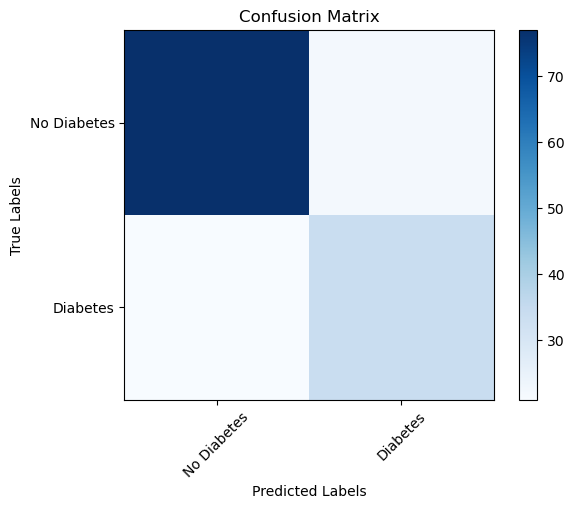

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

# Confusion Matrix Visualization
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    tick_marks = np.arange(len(np.unique(y_true)))
    plt.xticks(tick_marks, ['No Diabetes', 'Diabetes'], rotation=45)
    plt.yticks(tick_marks, ['No Diabetes', 'Diabetes'])
    plt.show()



# Plotting the graphs
plot_confusion_matrix(y_test, y_pred)

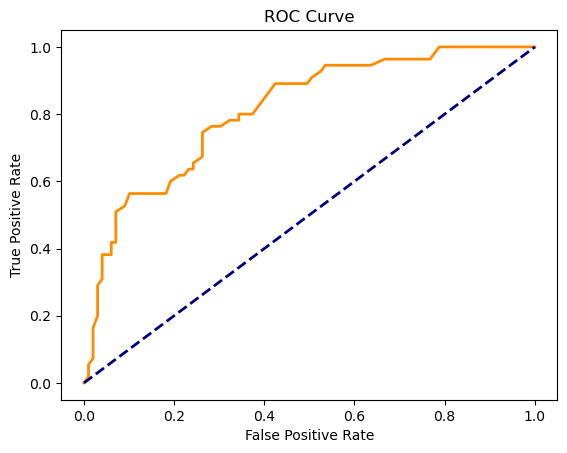

In [26]:
# ROC Curve
def plot_roc_curve(y_true, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    plt.plot(fpr, tpr, color='darkorange', lw=2)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()


# Plotting the graphs
plot_roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])

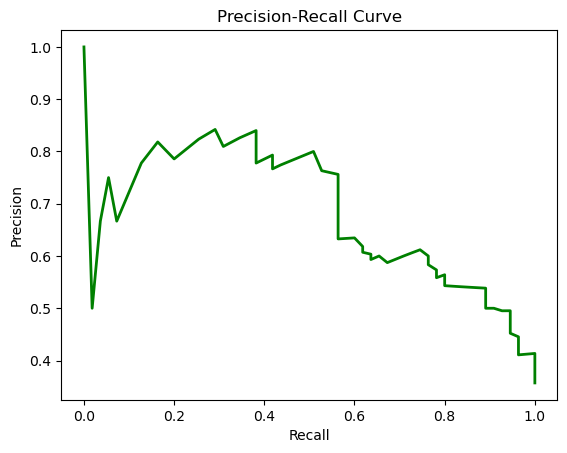

In [27]:
# Precision-Recall Curve
def plot_precision_recall_curve(y_true, y_pred_proba):
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
    plt.plot(recall, precision, color='green', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()


# Plotting the graphs
plot_precision_recall_curve(y_test, classifier.predict_proba(X_test)[:, 1])


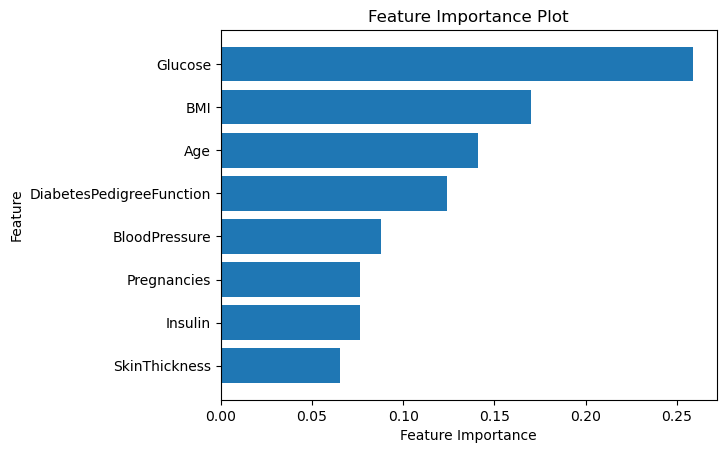

In [28]:
# Feature Importance Plot
def plot_feature_importance(feature_importance, feature_names):
    sorted_idx = feature_importance.argsort()
    plt.barh(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(feature_importance)), [feature_names[i] for i in sorted_idx])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance Plot')
    plt.show()

# Plotting the graphs
plot_feature_importance(classifier.feature_importances_, X.columns)


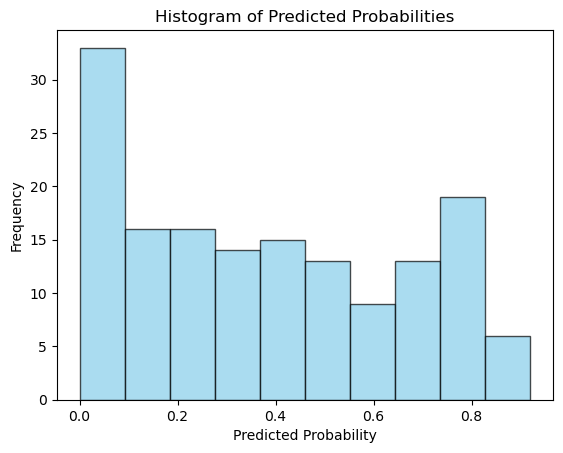

In [29]:
# Histogram of Predictions
def plot_prediction_histogram(y_pred_proba):
    plt.hist(y_pred_proba, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.title('Histogram of Predicted Probabilities')
    plt.show()

# Plotting the graphs
plot_prediction_histogram(classifier.predict_proba(X_test)[:, 1])